<img src="https://i.ibb.co/TcVMz44/logo.jpg" alt="logo" border="0" width=200>

# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia


## ODE II. Boundary Conditions. Example


### About this notebook

In this notebook we present some of the techniques to solve a system of Ordinary Differential Equations with boundary conditions.

`A. Garcia. Numerical Methods for Physics. (1999). Chapter 3 `

---

## Example of a BVP

We will consider the following BVP example,

\begin{equation}
\frac{d^2 y}{dx^2} = 12x - 4, \hspace{0.5cm} y(0)=0, \hspace{0.5cm} y(1) =0.1
\end{equation}

for which we want to find a solution in the interval $[0,1]$.

First, we can express this problem as the first order system

\begin{align}
\frac{dy}{dx} =& u(x)\\
\frac{du}{dx} =& 12x-4
\end{align}

Now, we implement these equations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def ODE(x0, q0):
    y = q0[0]
    u = q0[1]
    f = np.zeros(2)
    f[0] = u
    f[1] = 12*x0 - 4
    return f


---
## The Shooting Method

In the shooting method, we transform the BVP into an initial value problem by introducing a guess on the unknown value of $u(0)$. Then, we iterate until a modified guessed inner boundary condition leads to the correct known outer boundary value.

In this particular example, we will use the following conditions at $x=0$,

\begin{align}
y(0) = &0 \\
u(0) = &\left. \frac{dy}{dx} \right|_{x=0} = u_0 = 900
\end{align}

The initial value of the derivative, $u_0$, is a random guess to probe our implementation. Now, we will use a forward Euler integrator to solve the system with these initial values. We will print the value of the obtained function at $x=1$,

In [2]:
def FEuler(h, t0, q0):
    '''
    ------------------------------------------
    FEuler(h, t0, q0)
    ------------------------------------------
    Forward Euler's method for solving a ODEs 
    system.
    Arguments:
    h: stepsize for the iteration
    t0: independent parameter initial value
    q0: numpy array with the initial values of
        the functions in the ODEs system
    ------------------------------------------
    '''
    f = ODE(t0, q0)
    q1 = q0 + h*f
    return q1


# Creation of the grid
x_0 = 0.
x_f = 1.

# Number of steps in the grid
n = 10000

# Constant stepsize defined by the number of steps in the grid
h = (x_f - x_0)/n

# Arrays to store the solution
x = np.linspace(x_0, x_f, n) # x information
Q = np.zeros([2,n]) # Euler's Method information

# Initial Conditions
Q[0,0] = 0.
Q[1,0] = 900 # guessed value of u_0 


# Main loops for solving the problem

for i in range(1,n):
    q0 = Q[:,i-1]
    qf = FEuler(h, x[i-1], q0)
    Q[:,i] = qf[:]

print(r'y(1)=', Q[0,n-1])


y(1)= 899.909600079995


---
Clearly, this value is not the one that we expect from the BVP formulation, y(1)=0.1. Then, we will implement the shooting method by defining the function 

\begin{equation}
\Phi(u_0) = y(1,u_0) - 0.1
\end{equation}

and search for a $u_0$ so that $\Phi(u_0) = 0$. Hence, we implement the secant method to  find the root of the function $\Phi(u_0)$, beggining with the values $u_0 = 1000$ and $u_1 = 999$. 


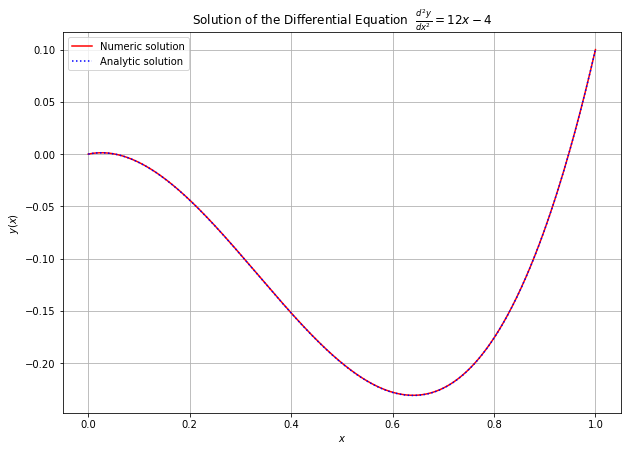



The boundary value is y(1)= 0.10000000000000123
The appropiate initial value is u_0 = 0.10040996099609882


In [3]:
def FEuler(h, t0, q0):
    '''
    ------------------------------------------
    FEuler(h, t0, q0)
    ------------------------------------------
    Forward Euler's method for solving a ODEs 
    system.
    Arguments:
    h: stepsize for the iteration
    t0: independent parameter initial value
    q0: numpy array with the initial values of
        the functions in the ODEs system
    ------------------------------------------
    '''
    f = ODE(t0, q0)
    q1 = q0 + h*f
    return q1


# Creation of the time grid
x_0 = 0.
x_f = 1.

# Number of steps in the grid
n = 10000

# Constant stepsize defined by the number of steps in the grid
h = (x_f - x_0)/n

# Arrays to store the solution
x = np.linspace(x_0, x_f, n) # x information
Q = np.zeros([2,n]) # Euler's Method information


# Initial guess for the first derivative
u_0 = 1000
u_1 = 999

# Initial Condition
Q[0,0] = 0.
Q[1,0] = u_0

# First Loop to solve the problem with the initial guess z_0
for i in range(1,n):
    q0 = Q[:,i-1]
    qf = FEuler(h, 0, q0)
    Q[:,i] = qf[:]

Phi_0 = Q[0,n-1] - 0.1 # Just to probe our first guess!
    

# Main loop for solving the problem including the secant method
while np.abs(Phi_0)>1E-10: # Criteria for the zero of the auxiliar function Phi
    Q[1,0] = u_1
    for i in range(1,n):
        q0 = Q[:,i-1]
        qf = FEuler(h, x[i-1], q0)
        Q[:,i] = qf[:]
    Phi_1 = Q[0,n-1] - 0.1
    
    Q[1,0] = u_0
    for i in range(1,n):
        q0 = Q[:,i-1]
        qf = FEuler(h, x[i-1], q0)
        Q[:,i] = qf[:]
    Phi_0 = Q[0,n-1] - 0.1
    
    # Secant method for finding the root of Phi
    new_u = u_0 - Phi_0*(u_0 - u_1)/(Phi_0 - Phi_1)
    u_1, u_0 = u_0, new_u
    

plt.figure(figsize=(10,7))
plt.plot(x, Q[0,:], color='red', label=r'Numeric solution')
plt.plot(x, 2*x**3 - 2*x**2 + 0.1*x, ':b', label=r'Analytic solution')
plt.title(r'Solution of the Differential Equation  $\frac{d^2y}{dx^2}=12x-4$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')

plt.grid()
plt.legend()
plt.show()

print('\n')
print(r'The boundary value is y(1)=', Q[0,n-1])
print(r'The appropiate initial value is u_0 =', u_0)

Note that the iterative process gives the value for the intitial derivative, $u_0$ and the corresponding value of the integrated function at the boundary, $y(1) = 0.1$, which is equal to the expected value. 

---


## Finite Differences Method

In this section, we will solve the BVP using the Finite Differences Method. First, we write the ODE as

\begin{equation}
y'' = g(x) - p(x)y' - q(x) y\,\,,
\end{equation}

where
\begin{align}
g(x) = &12x -4\\ 
p(x) = &0\\
q(x)= &0
\end{align}

and the boundary conditions are
\begin{equation}
y(0)=0, \hspace{0.5cm} y(1) =0.1
\end{equation} 

Now, we define the grid for the discretization, using $N=n+1=10000$ points.

In [4]:
# Creation of the time grid (in years)
x_0 = 0.
x_f = 1.

# Number of steps in the grid N=n+1
N = 10000
n = N-1

# Constant stepsize defined by the number of steps in the grid
h = (x_f - x_0)/N

# Arrays to store the solution
x = np.linspace(x_0, x_f, N) # x information

The discrete version of these equations is a system of $n+2$ linear algebraic equations,

\begin{equation}
\begin{aligned}
y_0 &= A\,\,\\
\left(1-\frac{h}{2}p_i \right)  y_{i-1} - \left(2-h^2q_i \right) y_i +  \left(1+\frac{h}{2}p_i \right) y_{i+1} &= h^2 g_i\,\,\\
y_{n+1} &= B\,\,,
\end{aligned}
\end{equation}

where $p_i = p(x_i)$, $g_i = g(x_i)$, and $q_i = q(x_i)$.


This system is a tri-diagonal matrix of dimension $n \times n$:

\begin{equation}
\begin{pmatrix}
-2+h^2q_1 & 1+ \frac{h}{2}p_1& 0 & \cdots &\cdots&\cdots  &0\\
1-\frac{h}{2} p_2&\ddots&\ddots & 0 &\cdots & \cdots & 0\\
0 & \ddots & \ddots & \ddots & 0 & \cdots & \vdots\\
\vdots & 0 & \ddots & \ddots & \ddots & 0 & \vdots \\
\vdots & \vdots & 0 & \ddots & \ddots & \ddots & 0\\
\vdots & \vdots & \vdots& 0& \ddots & \ddots & 1+\frac{h}{2}p_{n-1}\\
\vdots & 0 & 0 & \cdots & 0 & 1-\frac{h}{2} p_n & -2+h^2 q_n\\
\end{pmatrix}
\begin{pmatrix}
y_1\\\vdots \\\vdots \\\vdots \\\vdots \\\vdots \\ y_n
\end{pmatrix}
= \begin{pmatrix}
h^2 g_1 - A(1-\frac{h}{2}p_1)\\
h^2 g_2\\
\vdots\\
\vdots\\
\vdots\\
h^2 g_{n-1}\\
h^2 g_n - B(1+\frac{h}{2}p_n)\\
\end{pmatrix}
\end{equation}

Now, we implement this linear system as

In [5]:
A = np.zeros([n,n]) # We define a nxn matrix but we will not use the 0-file 0-row space
b = np.zeros(n) # We define a vector of size n but we will not use the 0-component

# Definition of the matrix A
for i in range(1,n):
    A[i,i] = -2 # Diagonal Elements

for i in range(1,n-1):
    A[i,i+1] = 1 # Up-diagonal elements

for i in range(2,n):
    A[i,i-1] = 1 # Low-diagonal elements

# Definition of the vector b
g = 12*x -4
for i in range(1,n):
    b[i] = g[i]*h**2
# Inclusion of the initial conditions
b[1] = b[1] - 0
b[n-1] = b[n-1] -0.1

The LSEs is a tridiagonal system and it is solved by the algorithm

1. **Forward Elimination.**
 * At the first step: $d_1 = b_1$ and $y_1 = f_1 / d_1$.
 
 * At the $k$-th step:
  \begin{equation*}
    \begin{aligned}
      d_k & = b_k - a_{k-1} c_{k-1} / d_{k-1}\,\,,\\
      y_k & = (f_k - y_{k-1} a_{k-1}) / d_k\,\,.
    \end{aligned}
  \end{equation*}

2. **Backward Substitution.** The $x_k$ are given by

  \begin{equation*}
    \begin{aligned}
      x_n &= y_n\,\,,\\
      x_{k-1} &= y_{k-1}- x_k c_{k-1} / d_{k-1}\,\,.
    \end{aligned}
  \end{equation*}

In [6]:
# Forward Elimination

d = np.zeros(n)
w = np.zeros(n)

d[1] = A[1,1]
w[1] = b[1]/d[1]

for i in range(2,n):
    d[i] = A[i,i] - A[i,i-1]*A[i-1,i]/d[i-1]
    w[i] = (b[i] - w[i-1]*A[i,i-1])/d[i]


# Backward Substitution

y = np.zeros(N)
y[0] = 0.
y[N-1] = 0.1

y[N-2] = w[N-2]
for i in range(N-3,-1,-1):
    y[i] = w[i] - y[i+1]*A[i,i+1]/d[i+1]


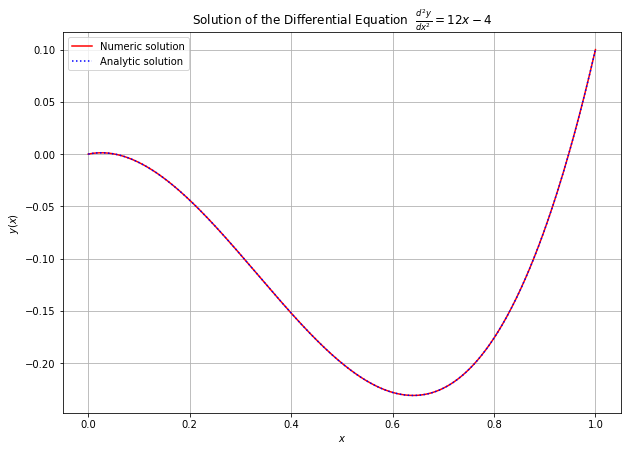

In [7]:
plt.figure(figsize=(10,7))
plt.plot(x, y, color='red', label=r'Numeric solution')
plt.plot(x, 2*x**3 - 2*x**2 + 0.1*x, ':b', label=r'Analytic solution')
plt.title(r'Solution of the Differential Equation  $\frac{d^2y}{dx^2}=12x-4$')
plt.xlabel(r'$x$')
plt.ylabel(r'$y(x)$')

plt.grid()
plt.legend()
plt.show()

    
